# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Diabetes Prediction Analysis</p>

 <div style="text-align:center">
    <img src="https://www.niddk.nih.gov/-/media/Images/Health-Information/Diabetes/diabetes-monitor-fruits-vegetables-small_597x347.png" alt="Diabetes Monitoring" />
</div>

# **Libraries**

In [1]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Importing machine learning-related libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from xgboost import XGBClassifier

# Importing imbalanced learning libraries for dealing with class imbalance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

## Introduction

Our goal is to extract meaningful information from the data and uncover any interesting findings or trends that can guide our decision-making process. By plotting various graphs and visualizations, we can effectively explore the dataset and derive valuable insights.

Let's get started

## Summary of the dataset 
This dataset contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

## Summary of the columns

Certainly! Here's the summary of the columns with backticks (`) added for easy code integration:

- `gender`: Gender refers to the classification of individuals as male or female. It is an important demographic factor that can influence various aspects of health and medical conditions.

- `age`: Age represents the number of years a person has lived since birth. It provides insight into the individual's life stage, potential health risks, and susceptibility to certain diseases or conditions associated with specific age groups.

- `hypertension`: Hypertension, often referred to as high blood pressure, is a medical condition characterized by persistently elevated blood pressure in the arteries. It is a significant risk factor for various cardiovascular diseases and can lead to serious health complications if left unmanaged.

- `heart_disease`: Heart disease refers to a range of conditions affecting the heart, such as coronary artery disease, heart failure, or heart rhythm disorders. It is a broad term encompassing various cardiovascular disorders that can impact the overall functioning of the heart.

- `smoking_history`: Smoking history indicates whether an individual has a past or present habit of smoking tobacco products. Smoking is a well-known risk factor for numerous health problems, including respiratory diseases, cardiovascular diseases, and certain types of cancer.

- `bmi`: Body Mass Index (BMI) is a measure of body fat based on an individual's weight and height. It provides an estimation of whether a person's weight is within a healthy range or if they are underweight, overweight, or obese. BMI is commonly used as a screening tool for assessing the risk of weight-related health issues.

- `HbA1c_level`: HbA1c (Hemoglobin A1c) level is a laboratory test that measures the average blood sugar (glucose) levels over the past 2-3 months. It is commonly used in the diagnosis and management of diabetes. Higher HbA1c levels indicate poorer blood sugar control and may indicate the need for adjustments in diabetes treatment.

- `blood_glucose_level`: Blood glucose level refers to the concentration of glucose (sugar) in the bloodstream. It is an important indicator of an individual's blood sugar regulation. Abnormal blood glucose levels, either too high (hyperglycemia) or too low (hypoglycemia), can be associated with various health conditions, particularly diabetes.

- `diabetes`: Diabetes is a chronic medical condition characterized by elevated blood sugar levels due to insufficient insulin production or ineffective use of insulin in the body. It requires careful management and monitoring of blood sugar levels to prevent complications. Diabetes can have significant impacts on overall health and may require lifestyle modifications, medication, and regular medical care.

## Reading the dataset 

In [3]:
df = pd.read_csv(r'C:\Users\Ashish Chauhan\Downloads\BIA Capston project\diabetes_prediction_dataset 1.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.duplicated().sum()

3854

In [7]:
df.drop_duplicates(inplace=True)

## Preliminary analysis of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


By using the describe function we got to know the mean, standard deviation, total count, min and max values. it is used to calculate the statistical data

In [10]:
for col, null_count in df.isnull().sum().items():
    print(f"{col} has {null_count} null values")

gender has 0 null values
age has 0 null values
hypertension has 0 null values
heart_disease has 0 null values
smoking_history has 0 null values
bmi has 0 null values
HbA1c_level has 0 null values
blood_glucose_level has 0 null values
diabetes has 0 null values


### Obervations from preliminary analysis:
- No null values in any of the columns
- Max values of  BMI and Blood Glucose Level look too high for now, we have to check for outliers later 

## Exploratory Data Analysis

## Segregating columns into types
- **Numerical** - age, bmi, HbA1c_level, blood_glucose_level
- **Categorical** - hypertension, heart_disease,diabetes, gender 

## Univariate Analysis 
- Univariate analysis focuses on analyzing each feature in the dataset independently.
- Distribution analysis:
    - The distribution of each feature is examined to identify its shape, central tendency, and dispersion.
- Identifying potential issues:
    - Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

### Univariate analysis on age 

In [11]:
import seaborn as sns
sns.color_palette('pastel')
import matplotlib.pyplot as plt

In [12]:
df.age.describe()

count    96146.000000
mean        41.794326
std         22.462948
min          0.080000
25%         24.000000
50%         43.000000
75%         59.000000
max         80.000000
Name: age, dtype: float64

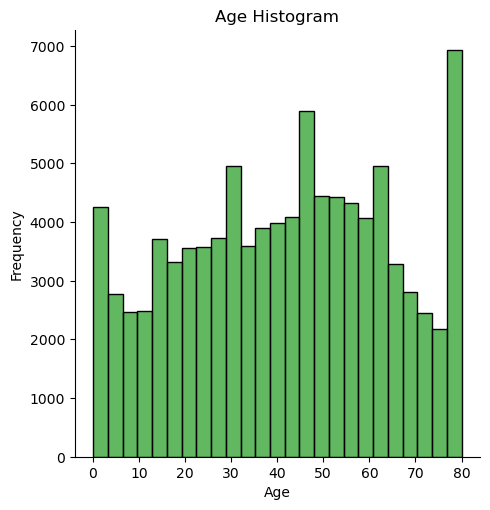

In [13]:
ax = sns.displot(data=df, x='age', kind='hist', color = sns.color_palette()[2], bins = 25)
ax.set(title='Age Histogram', xlabel='Age', ylabel='Frequency')

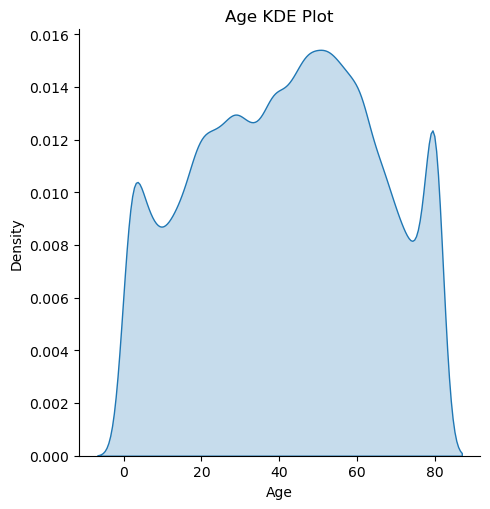

In [14]:
sns.displot(df['age'], kind='kde', fill=True)
plt.title('Age KDE Plot')
plt.xlabel('Age')
plt.show()

In [15]:
df['age'].skew()

-0.062444736060842554

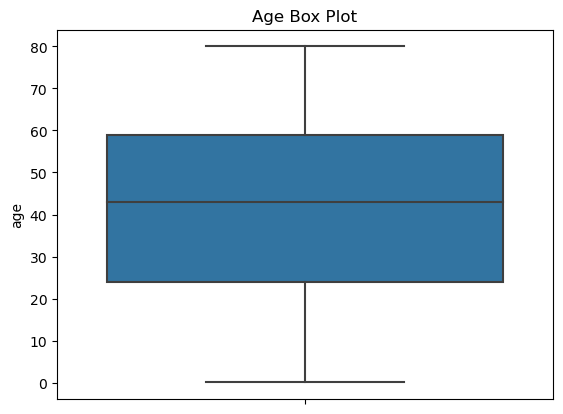

In [16]:
sns.boxplot(data=df, y='age')
plt.title('Age Box Plot')
plt.show()

#### Conclusions
- No missing values 
- No outliers
- Data is very slightly left skewed 

### Univariate analysis on bmi 

In [17]:
df['bmi'].describe()

count    96146.000000
mean        27.321461
std          6.767716
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64

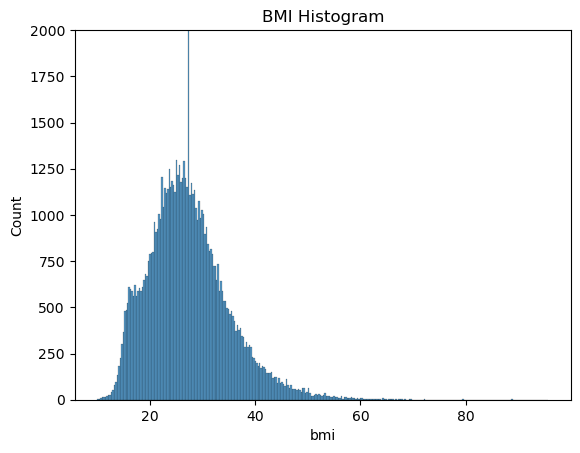

In [18]:
sns.histplot(df['bmi'])
plt.ylim((0, 2000))
plt.title('BMI Histogram')
plt.show()

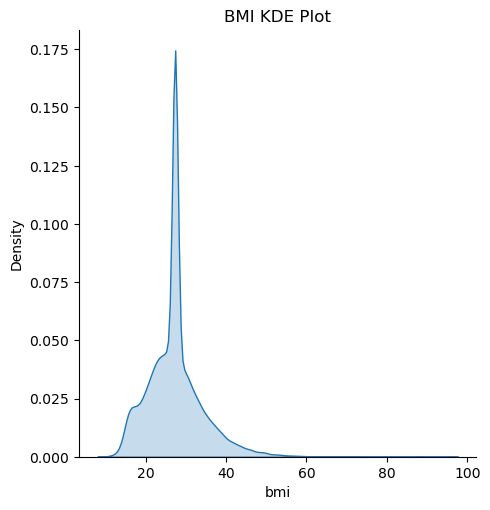

In [19]:
sns.displot(df['bmi'], kind='kde', fill=True)
plt.title('BMI KDE Plot')
plt.show()

In [20]:
df.bmi.skew()

1.0237511657232292

In [21]:
df.bmi.value_counts()

bmi
27.32    21666
23.00      103
27.12      101
24.96      100
27.80      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64

In [22]:
df.bmi.value_counts(normalize=True).head(10)*100

bmi
27.32    22.534479
23.00     0.107129
27.12     0.105049
24.96     0.104008
27.80     0.104008
22.40     0.102968
25.00     0.102968
25.60     0.101928
24.50     0.097768
26.70     0.097768
Name: proportion, dtype: float64

#### Hunting for outliers

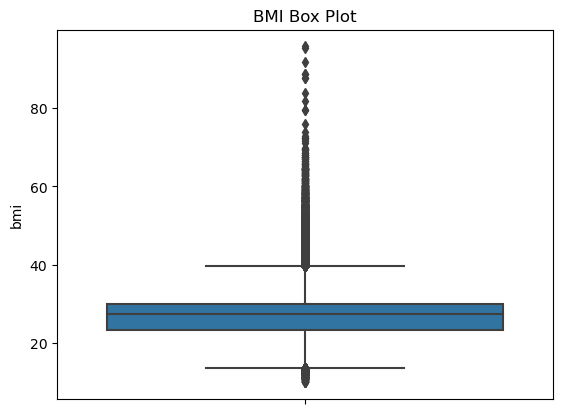

In [23]:
# Hunting for outliers
sns.boxplot(data=df, y='bmi')
plt.title('BMI Box Plot')
plt.show()

#### analyzing outliers

In [24]:
df.query('bmi > 40 or bmi < 15')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
11,Female,54.0,0,0,former,54.70,6.0,100,0
24,Female,4.0,0,0,No Info,13.99,4.0,140,0
39,Female,34.0,0,0,never,56.43,6.2,200,0
59,Female,67.0,0,0,never,63.48,8.8,155,1
93,Male,38.0,0,0,never,55.61,6.5,130,0
...,...,...,...,...,...,...,...,...,...
99906,Male,3.0,0,0,No Info,14.21,6.6,145,0
99933,Female,5.0,0,0,No Info,13.34,6.5,155,0
99953,Female,59.0,1,0,ever,60.52,3.5,158,0
99960,Female,47.0,0,0,former,45.15,4.0,126,0


In [25]:
len(df.query('bmi > 40 or bmi < 15')) / len(df) * 100

6.312275081646662

#### Conclusions
- No missing values
- Data is right skewed 
- 25% of the people have a BMI of 27.32 exactly
- About 6000 data points are outliers (6% of the total data)

#### Why do so many people have the exact same BMI?

In [26]:
df.query('bmi == 27.32').sample(50)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1388,Male,53.0,0,0,not current,27.32,4.0,90,0
6508,Male,23.0,0,0,not current,27.32,6.2,159,0
17366,Male,57.0,1,0,current,27.32,6.5,130,0
55933,Female,38.0,0,0,never,27.32,4.8,80,0
85708,Female,6.0,0,0,No Info,27.32,4.0,145,0
35519,Female,72.0,0,0,No Info,27.32,4.0,200,0
51612,Female,42.0,0,0,No Info,27.32,5.8,126,0
7428,Female,50.0,0,0,No Info,27.32,6.1,100,0
39129,Female,80.0,0,0,never,27.32,6.5,126,0
7682,Female,17.0,0,0,No Info,27.32,6.0,126,0


After running the sample function for a few times, I noticed people aged under 10 having a BMI of 27; which is not possible, so let us analyze the age again

In [27]:
df.query('age < 10 and bmi == 27.32')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
41,Male,5.00,0,0,No Info,27.32,6.6,130,0
173,Male,8.00,0,0,No Info,27.32,6.6,155,0
183,Male,9.00,0,0,No Info,27.32,6.5,85,0
205,Male,6.00,0,0,No Info,27.32,5.7,200,0
226,Male,2.00,0,0,No Info,27.32,5.7,85,0
...,...,...,...,...,...,...,...,...,...
99780,Female,7.00,0,0,No Info,27.32,3.5,126,0
99798,Male,5.00,0,0,No Info,27.32,6.1,145,0
99808,Female,3.00,0,0,never,27.32,3.5,90,0
99882,Female,3.00,0,0,No Info,27.32,6.0,140,0


In [28]:
len(df.query('age < 10 and bmi == 27.32')) / len(df)*100

1.4030744908784558

#### Conclusions after analyzing BMI and Age columns
- there are people aged below 10 with a BMI of 27.32 which is highly unlikely 
- on digging further we see that people with age as low as few months also have the same BMI
- this might be an error on the way the data was collected 
- for now these are treated as outliers 

### Univariate Analysis on HbA1c_level

In [29]:
df['HbA1c_level'].describe()

count    96146.000000
mean         5.532609
std          1.073232
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64

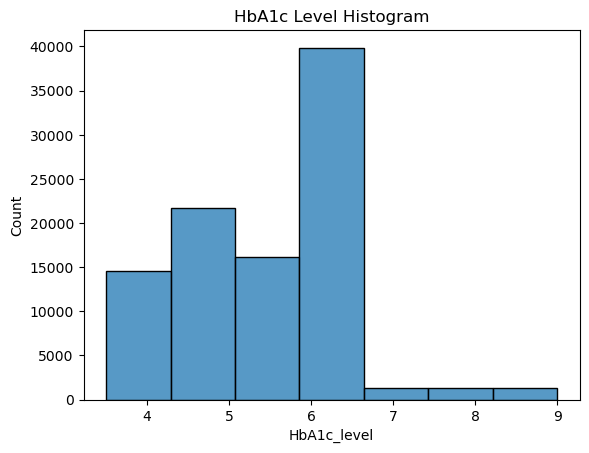

In [30]:
sns.histplot(df['HbA1c_level'],bins=7)
plt.title('HbA1c Level Histogram')
plt.show()

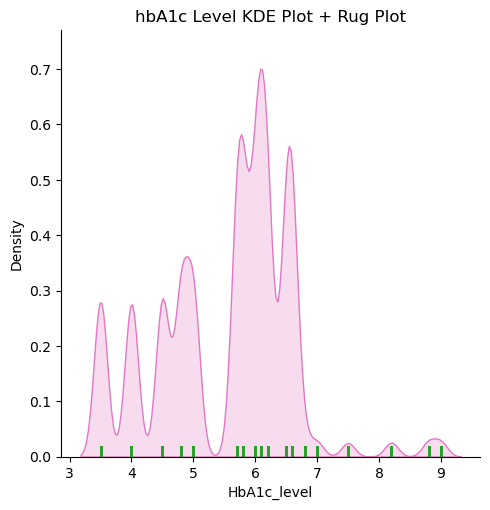

In [31]:
ax = sns.displot(data=df, x='HbA1c_level', color = sns.color_palette()[6], kind='kde', fill=True)
sns.rugplot(data=df, x='HbA1c_level', color = sns.color_palette()[2])
ax.set(title='hbA1c Level KDE Plot + Rug Plot')

In [32]:
df['HbA1c_level'].value_counts(normalize=True)*100

HbA1c_level
6.6    8.491253
5.7    8.449649
6.5    8.373723
5.8    8.312358
6.0    8.308198
6.2    8.276995
6.1    8.025295
3.5    7.612381
4.8    7.588459
4.5    7.582219
4.0    7.493811
5.0    7.441807
8.8    0.686456
8.2    0.685416
9.0    0.678135
7.5    0.667734
6.8    0.667734
7.0    0.658374
Name: proportion, dtype: float64

<Axes: ylabel='HbA1c_level'>

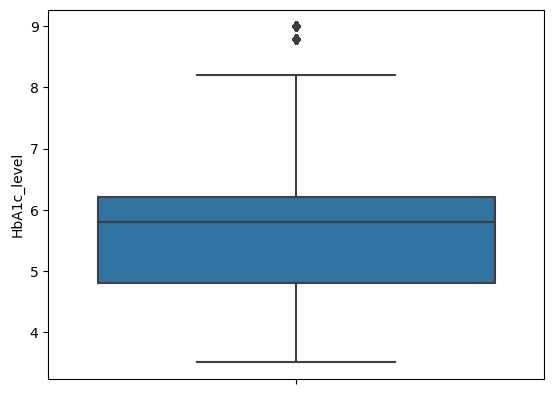

In [33]:
sns.boxplot(data=df, y='HbA1c_level')

#### Conclusions
- This value is not continuous 
- There are some outliers
- Most people fall in the range of 5 - 6.6 which is considred as healthy 

### Univariate Analysis on Blood Glucose Level Column

In [34]:
df['blood_glucose_level'].describe()

count    96146.000000
mean       138.218231
std         40.909771
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64

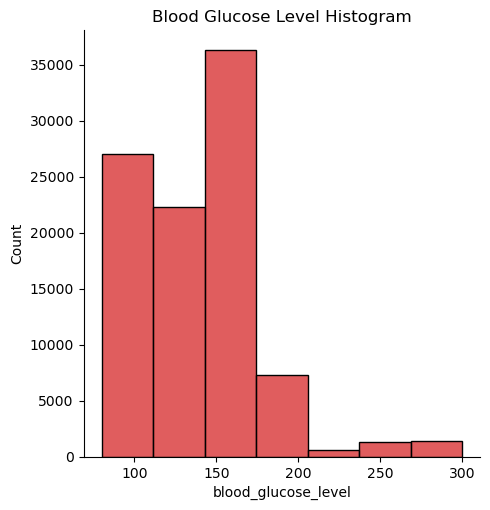

In [35]:
ax = sns.displot(data=df, x='blood_glucose_level', color = sns.color_palette()[3], bins=7)
ax.set(title='Blood Glucose Level Histogram')

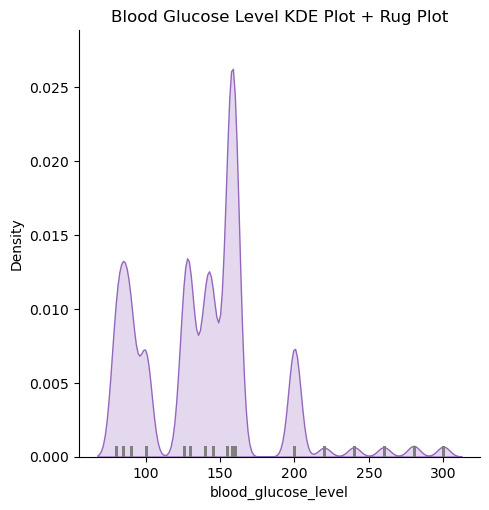

In [36]:
ax = sns.displot(data=df, x='blood_glucose_level', color = sns.color_palette()[4], kind='kde', fill=True)
sns.rugplot(data=df, x='blood_glucose_level', color = sns.color_palette()[7])
ax.set(title='Blood Glucose Level KDE Plot + Rug Plot')

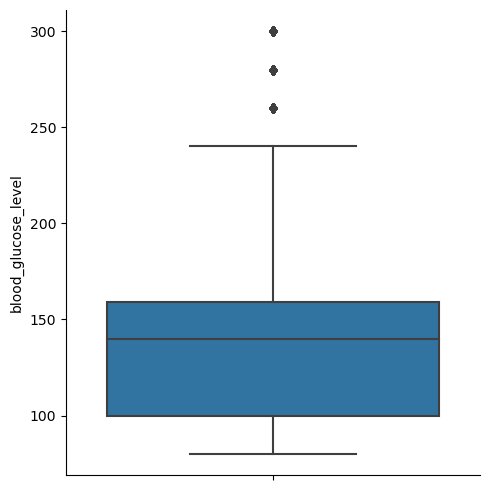

In [37]:
sns.catplot(kind='box', data=df, y='blood_glucose_level')

In [38]:
df['blood_glucose_level'].skew()

0.83648926055032

#### Conclusions 
- Positvely Skewed 
- Has Outliers
- 50% people fall in the 100 to 160 range

## Count Plots for Categorical Columns

[Text(0.5, 1.0, 'Count Plot of Gender')]

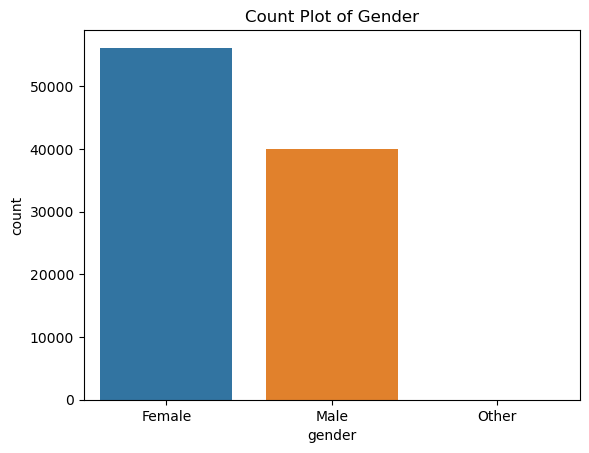

In [39]:
ax = sns.countplot(data=df, x='gender')
ax.set(title='Count Plot of Gender')

[Text(0, 0, 'No Hypertension'), Text(1, 0, 'Hypertension')]

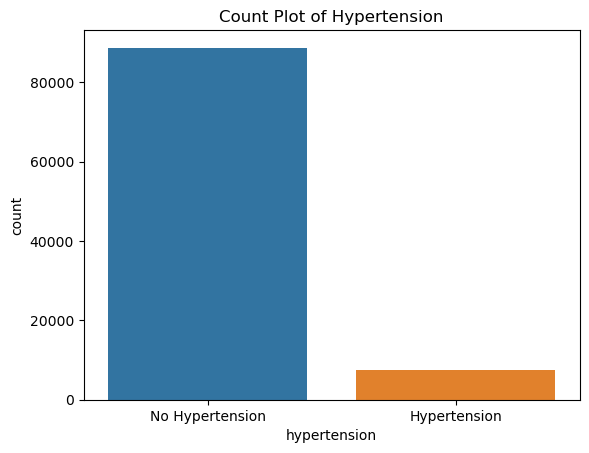

In [40]:
ax = sns.countplot(data=df, x='hypertension')
ax.set(title='Count Plot of Hypertension')
ax.set_xticklabels(['No Hypertension', 'Hypertension'])

[Text(0, 0, 'No Heart Disease'), Text(1, 0, 'Heart Disease')]

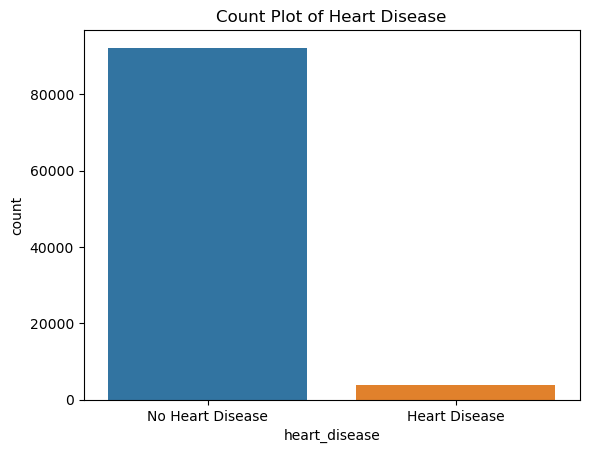

In [41]:
ax = sns.countplot(data=df, x='heart_disease')
ax.set(title='Count Plot of Heart Disease')
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])

[Text(0.5, 1.0, 'Count Plot of Smoking History')]

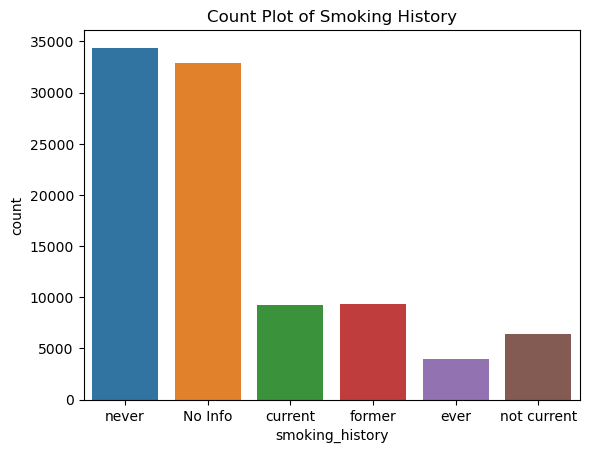

In [42]:
ax = sns.countplot(data=df, x='smoking_history')
ax.set(title='Count Plot of Smoking History')

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

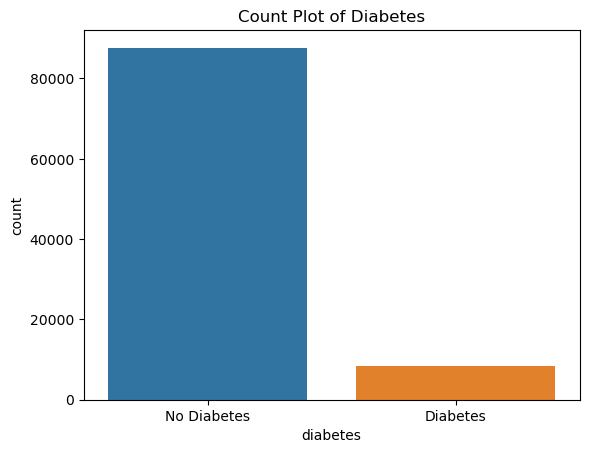

In [43]:
ax = sns.countplot(data=df, x='diabetes')
ax.set(title='Count Plot of Diabetes')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

## Bi-Variate Analysis

### Diabetes and Age column

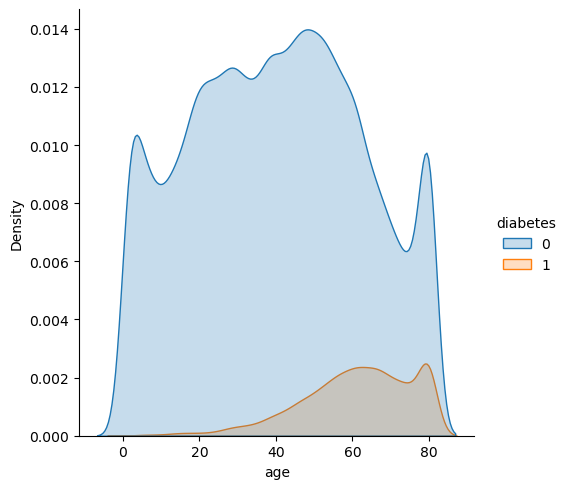

In [44]:
sns.displot(kind='kde', data=df, x='age', hue='diabetes', fill=True)

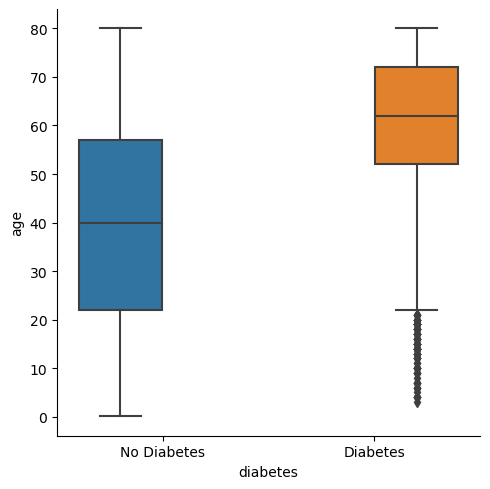

In [45]:
ax = sns.catplot(kind='box', data=df, x='diabetes', y='age',hue='diabetes')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

#### Conclusions
- Diabetes tends to affect older people generally
- It curve of diabetes tends to slowly rise when you hit 30s and the probability is maximum when you are aged around 60
- This tend to fit in well with the real world data 

### Diabetes and Gender column

In [46]:
temp_df = pd.crosstab(df['gender'], df['diabetes'], normalize='columns')*100

<Axes: xlabel='diabetes', ylabel='gender'>

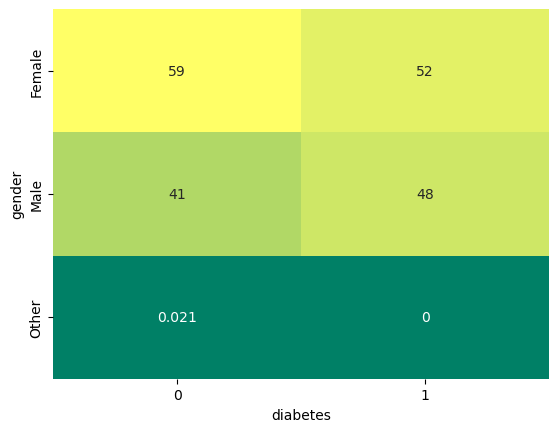

In [47]:
sns.heatmap(temp_df, annot=True, cmap='summer',cbar=False)

In [48]:
len(df[df['gender'] == 'Female'])

56161

In [49]:
len(df[df['gender'] == 'Male'])

39967

In [50]:
(58552 - 41430)/len(df)*100

17.808333159985853

#### Conclusion
- Diabetes affects both genders equally
- Here we 17% more female data, hence it is kind of biased

### Diabetes vs BMI column

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

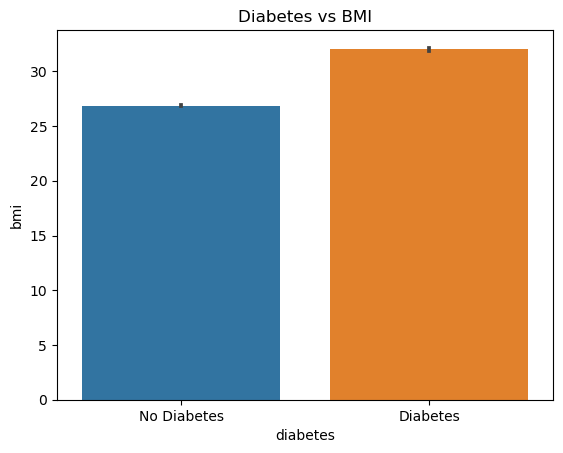

In [51]:
ax = sns.barplot(data=df, x='diabetes', y='bmi')
ax.set(title='Diabetes vs BMI')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

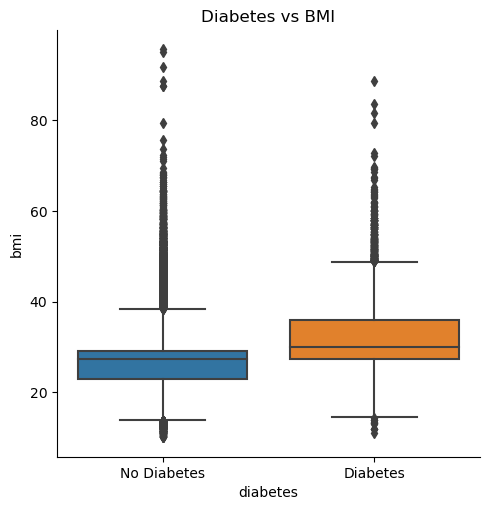

In [52]:
ax = sns.catplot(data=df, x='diabetes', y='bmi', kind='box')
ax.set(title='Diabetes vs BMI')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

#### Conclusions
- with increase in BMI, chance of diabetes increases 

### Diabetes vs HbA1c_level column

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

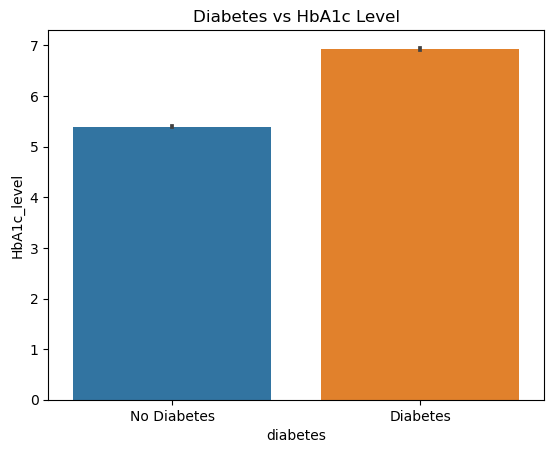

In [53]:
ax = sns.barplot(data=df, x='diabetes', y='HbA1c_level')
ax.set(title='Diabetes vs HbA1c Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

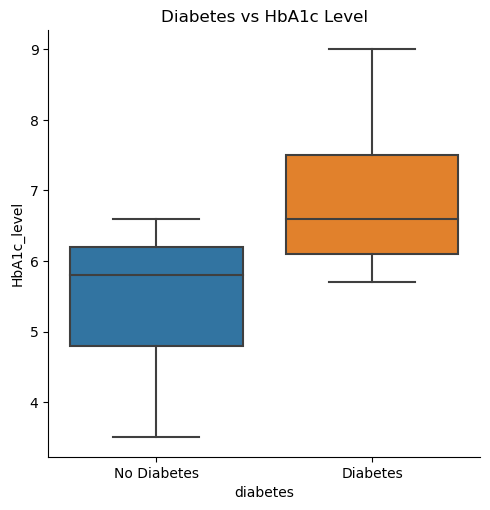

In [54]:
ax = sns.catplot(data=df, x='diabetes', y='HbA1c_level', kind='box')
ax.set(title='Diabetes vs HbA1c Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

#### Conclusion 
- with increase in HbA1c level, the chance of diabetes increases
- People who have diabetes have a median HbA1c value of around 6.7 

### Diabetes vs blood_glucose_level column

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

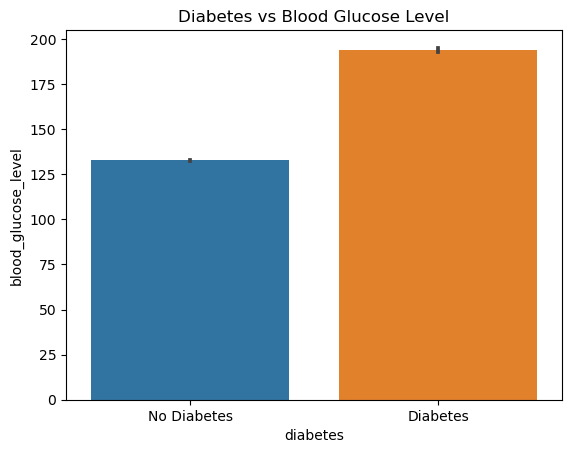

In [55]:
ax = sns.barplot(data=df, x='diabetes', y='blood_glucose_level')
ax.set(title='Diabetes vs Blood Glucose Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

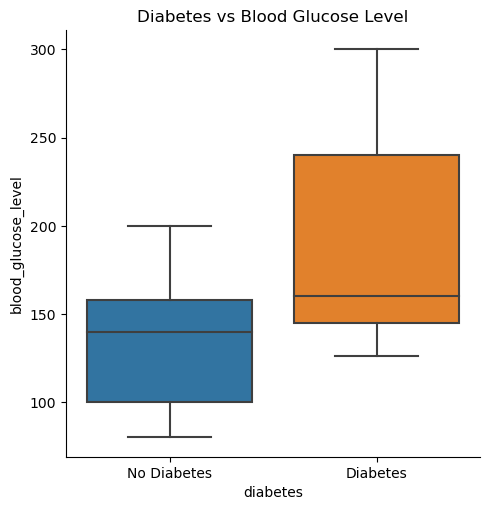

In [56]:
ax = sns.catplot(data=df, x='diabetes', y='blood_glucose_level', kind='box')
ax.set(title='Diabetes vs Blood Glucose Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

#### Conclusion
- with increase in blood glucose level, the chance of diabetes increases
- the people with diabetes have a blood glucose level of around 160 on average 

## Multi-variate analysis

### Diabetes - BMI - Age

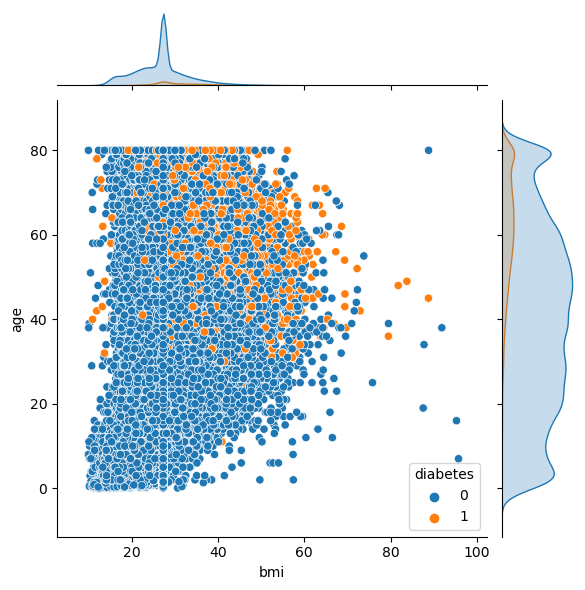

In [57]:
sns.jointplot(data=df, x='bmi', y='age', hue='diabetes', kind='scatter')

#### conclusions
- BMI increases as age increases, this maybe because as we grow older, we tend to neglect exercising regularly 
- we can see that older people who have more high BMI are more prone to diabetes 
- older people with healthy BMI are still doing fine

### Correlation Heatmap

In [58]:
df.corr(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257305,0.238451,0.344797,0.106719,0.114317,0.264927
hypertension,0.257305,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710
heart_disease,0.238451,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711
bmi,0.344797,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.106719,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.114317,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336
diabetes,0.264927,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000


[Text(0.5, 1.0, 'Correlation Heatmap')]

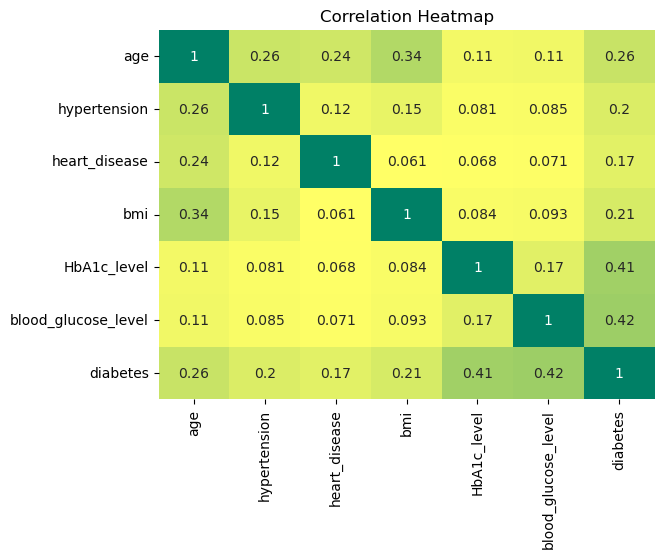

In [59]:
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='summer_r',cbar=False)
ax.set(title='Correlation Heatmap')

### <u>Observation</u>-
From the Above heatmap the highest correlated features are Blood Glucose Level, HbA1C Level, BMI, Hypertension and Heart Disease.

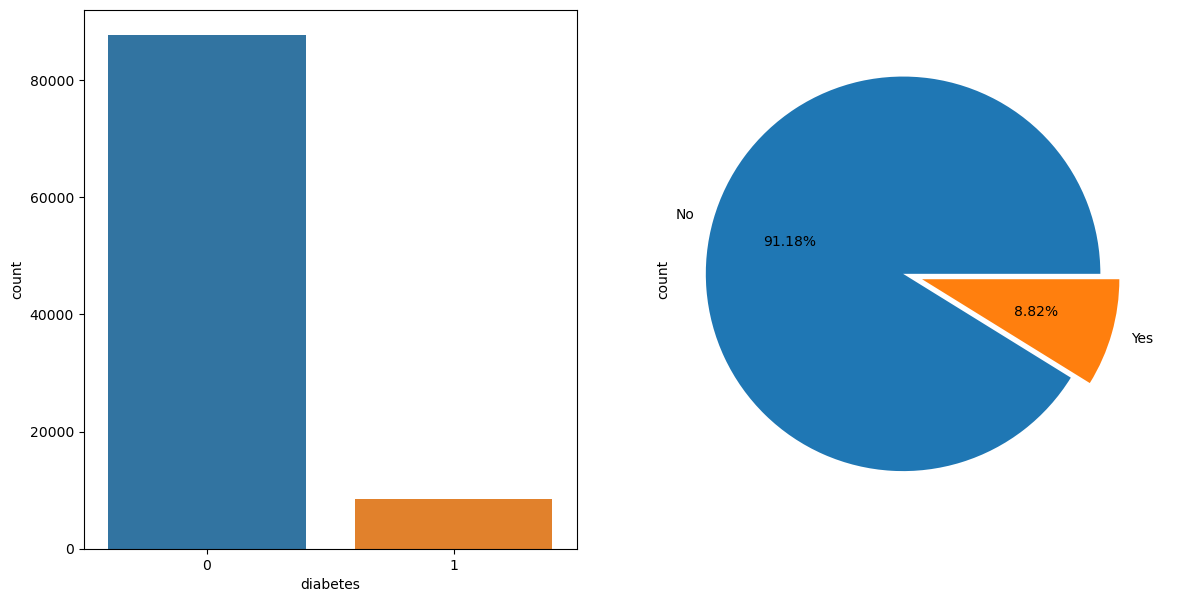

In [60]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
sns.countplot(data=df, x='diabetes', ax=ax[0])
df['diabetes'].value_counts().plot.pie(explode=[0.1,0], autopct="%1.2F%%", labels=["No","Yes"], ax=ax[1])
plt.show()

# **Feature encoding**

Convert categorical data into numerical data by importiing required library. it can be done by 2 methods or types label encoder and oneshort encoder

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int32  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int32  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 8.6 MB


In [63]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [64]:
# Split the Data:
# Spliting the dataset into features (X) and the target variable (y).

X =df.drop("diabetes" ,axis=1)
# X = df.iloc[:,:-1]
y =df['diabetes']
# y = df.iloc[:,-1]

In [65]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [66]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [67]:
# Splitting the dataset into a training set and a testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [68]:
X_train.shape, X_test.shape

((76916, 8), (19230, 8))

In [69]:
y_test.value_counts()

diabetes
0    17552
1     1678
Name: count, dtype: int64

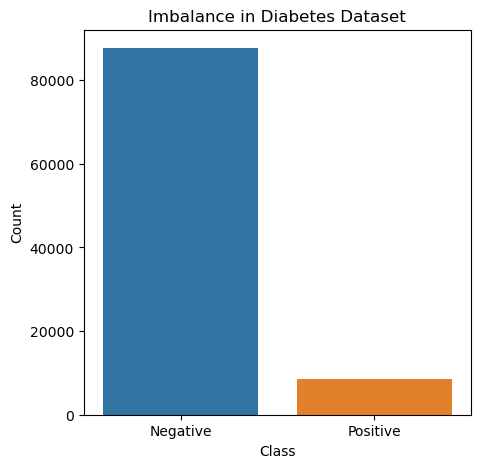

In [70]:
# Count the occurrences of each class
class_counts = df['diabetes'].value_counts()

# Plotting
plt.figure(figsize=(5, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Imbalance in Diabetes Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

#### Given the data imbalance, we'll balance it for classification using SMOTE, by importing the required libraries.

In [71]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [72]:
y_train_resampled.value_counts()

diabetes
0    70112
1    70112
Name: count, dtype: int64

# Logistic Regression

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))
print("\nAccuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-Score:", f1_score(y_test, y_pred_logreg))

Logistic Regression Evaluation:
Confusion Matrix:
[[15457  2095]
 [  231  1447]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     17552
           1       0.41      0.86      0.55      1678

    accuracy                           0.88     19230
   macro avg       0.70      0.87      0.74     19230
weighted avg       0.93      0.88      0.90     19230


Accuracy: 0.879043161726469
Precision: 0.4085262563523433
Recall: 0.8623361144219309
F1-Score: 0.5544061302681993


# Random Forest Classifier

In [74]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_resampled, y_train_resampled)

y_pred_rf = random_forest.predict(X_test)

print("\nRandom Forest Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))


Random Forest Evaluation:
Confusion Matrix:
[[17169   383]
 [  470  1208]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     17552
           1       0.76      0.72      0.74      1678

    accuracy                           0.96     19230
   macro avg       0.87      0.85      0.86     19230
weighted avg       0.95      0.96      0.96     19230


Accuracy: 0.9556422256890276
Precision: 0.7592708988057826
Recall: 0.7199046483909416
F1-Score: 0.7390639339247477


### XGBOOST CLASSIFIER

In [75]:
xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Evaluation:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nAccuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))


XGBoost Evaluation:
Confusion Matrix:
[[17323   229]
 [  491  1187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17552
           1       0.84      0.71      0.77      1678

    accuracy                           0.96     19230
   macro avg       0.91      0.85      0.87     19230
weighted avg       0.96      0.96      0.96     19230


Accuracy: 0.9625585023400937
Precision: 0.838276836158192
Recall: 0.7073897497020262
F1-Score: 0.7672915319974142


In [76]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
results = {
    'Logistic Regression': [accuracy_score(y_test, y_pred_logreg),
                            precision_score(y_test, y_pred_logreg),
                            recall_score(y_test, y_pred_logreg),
                            f1_score(y_test, y_pred_logreg)],
    
    'Random Forest': [accuracy_score(y_test, y_pred_rf),
                      precision_score(y_test, y_pred_rf),
                      recall_score(y_test, y_pred_rf),
                      f1_score(y_test, y_pred_rf)],
    
    'XGBoost': [accuracy_score(y_test, y_pred_xgb),
                precision_score(y_test, y_pred_xgb),
                recall_score(y_test, y_pred_xgb),
                f1_score(y_test, y_pred_xgb)]
}
results_df = pd.DataFrame(results, index=metrics)
results_df = results_df.T
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
styled_df = results_df.style.apply(highlight_max, axis=0)
styled_df

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.879043,0.408526,0.862336,0.554406
Random Forest,0.955642,0.759271,0.719905,0.739064
XGBoost,0.962559,0.838277,0.707390,0.767292
